### Objective Notes

The most active compound is called OSM-S-106. However, we do not understand how OSM-S-106 works to kill the 
malaria parasite. We wish to identify the target of OSM-S-106 in the parasite. <b>Knowing the target will help us create
more potent versions of OSM-S-106.</b>

We are in the process of performing experiments with OSM and KU to identify the OSM-S-106 target. Experiments are 
slow and very expensive. We would also like to apply machine learning methods to predict potential targets. To do 
that, we have calculated molecular descriptors, which describe chemical features of the drug candidate molecules. 

We wish to find descriptors that would help predict potency (described by the "IC50").

Questions we want to research:
Which descriptors best predict potency?
Our data set is very small. Finding an effective drug is like finding a needle in a haystack. This is a common problem with scientific data sets. Can we augment the data set with predicted negative data (molecules expected to be inactive) to improve our machine learning models? Are there certain characteristics of negative data sets that are the most useful for training?
Given the limited size of the data set and the high cost of experiments, can we use ML to identify the missing data that would be best for model training? In this way, ML would be recommending future experiments.
Apply the ML model to set of well-characterized drugs. Which cluster most closely with OSM-S-106? Would this provide clues as to the mechanism of OSM-S-106?
How well do more advanced ML models perform over simple methods like multiple linear regression, SVM, and random forest?



What is the activate compound (OSM-S-106) targeting within the malaria parasite?
Leverage experiment results and molecular descriptors of effective drug.
What dimensions are accurate predictors of "potency".




Is this feature a predictor of potency?
Scaling the feature and creating a new target that is an average of the potency times the presence of the characteristic


In [1]:
import pandas as pd
from sklearn.decomposition import KernelPCA
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Read in data
df = pd.read_csv("data/Series3_6.15.17_padel.csv")
# Drop examples without IC50
df = df[~df.IC50.isnull()]

In [13]:
# Column types and counts
from pprint import pprint
pprint(dict(zip(np.unique(df.dtypes),[len(df.columns[df.dtypes == 'int64']),
                                len(df.columns[df.dtypes == 'float64']),
                                len(df.columns[df.dtypes == 'O'])])))

{dtype('int64'): 473, dtype('float64'): 972, dtype('O'): 1}


In [14]:
""" Create dummies for categorical variables """

# No missing values in categorical.
sum(df[df.columns[df.iloc[:, :].dtypes == 'int64']].isnull().sum())
# Get dummy vars: filter to int type, convert to object, pass to get_dummies.
cat_vars_df = pd.get_dummies(df[df.columns[df.iloc[:, :].dtypes == 'int64']].astype('O'))

# 67 columns have missing values
sum(df[df.columns[df.iloc[:, :].dtypes == 'float64']].isnull().sum())
# Impute or remove? (for now remove any columns with nan
cont_vars_df = df[df.columns[df.iloc[:, :].dtypes == 'float64']].dropna(axis=1)

# Combine datasets
vars_df = pd.concat([cat_vars_df, cont_vars_df], axis=1)

In [15]:
# Manually separate color map to focus on effective compounds
# If less 10, make zero, set target to -.5, else 1
# TODO play around with varieties of splits for visualizations

def sep_var(x):
    if x < 1:
        return -.5
    elif x < 10:
        return 0
    else:
        return 1


color_map = df.IC50.apply(sep_var)

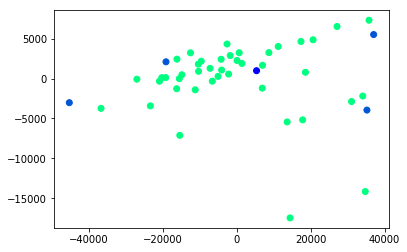

In [16]:
# Linear
pca = KernelPCA(n_components=None, kernel="linear", random_state=0, n_jobs=3)
pca_out = pca.fit_transform(vars_df)

# Plot the pca, gradient color with IC50 (red => potent to green)
plt.scatter(x=pca_out[:, 0], y=pca_out[:, 1], c=color_map, cmap="winter")
plt.show()

In [17]:
# All of the top performing compounds are evenly spread out across the top 2 dimensions
# of a linear PCA analysis.
# This might mean the dimension that is especially good at splitting these examples
# from the inactive compounds is not represented.
# This might also mean, that there are different "approaches" to treating malaria and
# different avenues to go down.
# Interesting: when looking at it this way, the highest performing is
# directly in the center of the performing compounds.